In [180]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

<h1>Assignment 2: Life Expectancy and You!</h1>

<b>Instructions:</b>
<ul>
<li>Use the worksheet below to act as a guide to exploring and examining the data in the dataset.
<li>Try to make things easy to read. Look at the formatting stuff above. 
<li>As long as you do what is asked, you can do things in many different ways. You may need to do a little searching. 
</ul>

### Please Use Formatting to Make it Clear What I Should be Looking at! Please!!! I Beg You!!!

In [181]:
#Load data and do some cleanup before starting
#Please don't change this stuff. 
dfLE = pd.read_csv("led.csv")
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()
dfLE.head()


,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,340.015425,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,2119.726679,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,2847.853392,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,1975.143045,1.014710e+07,8.04375
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,9759.305728,NaN,8.84375


<h2>Part 1: Add a column for GDP per Capita (5pts)</h2>

Show print the labels along with just that column. Print 10 random rows of that data. 

Note: you'll have to look at the units to ensure you get it right. 

In [182]:
# copy to a new dataframe
df_gdp = dfLE.copy()
df_gdp.head(10)

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,340.015425,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,2119.726679,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,2847.853392,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,1975.143045,1.014710e+07,8.04375
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,9759.305728,NaN,8.84375
5,Argentina,0.0,75.15625,106.0000,10.1250,7.966667,81.285714,2.0000,54.98125,11.3750,93.3750,92.3750,6998.575103,2.012120e+07,16.50625
6,Armenia,0.0,73.40000,117.3750,1.0000,3.702667,87.562500,274.2500,44.70625,1.0000,89.1250,87.3750,1999.986318,1.015165e+06,11.78750
7,Australia,1.0,81.81250,63.1875,1.0000,10.155333,93.400000,103.9375,55.86250,1.3750,86.7500,86.8750,34637.565047,4.587010e+06,20.03750
8,Austria,1.0,81.48125,65.7500,0.0000,12.236000,81.062500,77.2500,48.28750,0.0000,86.0000,86.7500,33827.476309,6.474880e+06,15.38750
9,Azerbaijan,0.0,70.73125,115.1875,6.0625,0.992000,59.214286,598.1875,43.84375,7.1875,75.8125,82.3125,3302.947807,2.157370e+06,11.35000


In [183]:
#Part 1
df_gdp['GDP_capita'] = dfLE['GDP'] / dfLE['Population']
df_gdp['GDP_capita'].sample(10)

124    0.010494
78          NaN
114    0.000024
89          NaN
41          NaN
180         NaN
116         NaN
40     0.007809
133    0.000423
131    0.000174
Name: GDP_capita, dtype: float64

In [184]:
# delete all NaN data in GDP_capita column.
df_gdp = df_gdp.dropna()
df_gdp.describe()

,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP_capita
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,1.330000e+02,133.000000,133.000000
mean,0.142857,68.139709,174.300282,35.902726,4.436893,77.272061,2657.467105,36.691964,49.817199,80.572006,80.699919,5408.637801,1.340066e+07,11.691823,0.022096
std,0.351250,9.254200,97.065845,133.819254,3.736886,17.174868,8473.612218,15.971021,181.414641,15.732438,16.431339,8750.957195,3.972571e+07,3.006460,0.117543
min,0.000000,46.112500,18.750000,0.000000,0.010000,9.000000,0.000000,12.875000,0.000000,32.875000,26.812500,137.815321,3.334250e+03,4.018750,0.000002
25%,0.000000,60.862500,114.312500,0.687500,1.074667,66.500000,15.125000,19.293750,1.000000,69.625000,70.500000,716.770068,1.007302e+06,9.868750,0.000110
50%,0.000000,70.731250,154.312500,3.312500,3.807333,79.600000,251.937500,39.743750,4.000000,84.375000,84.500000,2158.280869,3.735507e+06,12.000000,0.000628
75%,0.000000,74.262500,227.750000,23.250000,7.130000,91.812500,1880.812500,50.893750,35.562500,94.812500,95.000000,5179.256189,1.124072e+07,13.725000,0.004676
max,1.000000,82.518750,550.062500,1366.687500,13.497333,98.875000,65857.937500,69.431250,1812.500000,98.562500,98.937500,53257.012741,4.214677e+08,20.037500,1.145174


### Part 2: Print a visualization of each distribution. Both regular (density) and cumulative. (15pts)

Print each distribution is some type of visualization, also print the cumulative distribution. 
<ul>
<li>5 points are for using some visualization that is effective.
<li>5 points for formatting things in a nice layout. Hint: for whatever chart you use, look into some formatting options. Think of what to try to Google for an example for printing multiple charts, a grid of charts, etc... and try to adapt one to yours. There is also a way to do it using some thinkstats/thinkplot stuff. 
<li><b>5 points are for doing it in an efficient way - just listing off each column is lots of typing... Remember, the #1 trait of programmers is laziness with respect to repetitive tasks. If we are doing the same thing over and over with tiny changes, try to think of a condensed way to do this...</b>
</ul>

In [185]:
hist_gdp = thinkstats2.Hist(df_gdp['GDP_capita'], label = 'GDP_capita')


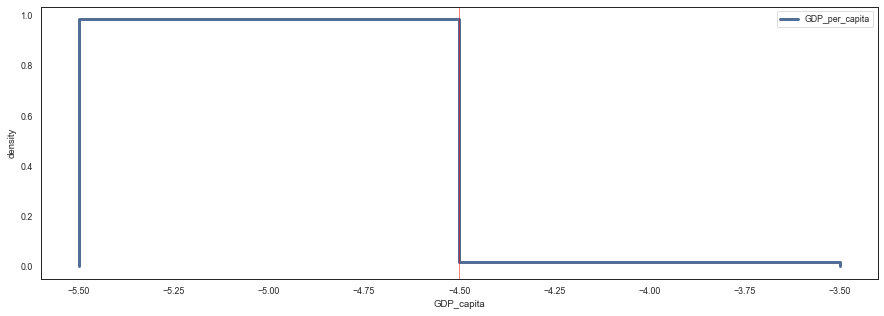

In [186]:
# this graph shows that this data has some outliers.
pmf_gdp = thinkstats2.Pmf(round(df_gdp['GDP_capita'])-5, label = 'GDP_per_capita')

thinkplot.Pmf(pmf_gdp)
thinkplot.Config(xlabel='GDP_capita', ylabel='density')
thinkplot.axvline(np.mean(pmf_gdp), color="red")


<AxesSubplot:ylabel='Density'>

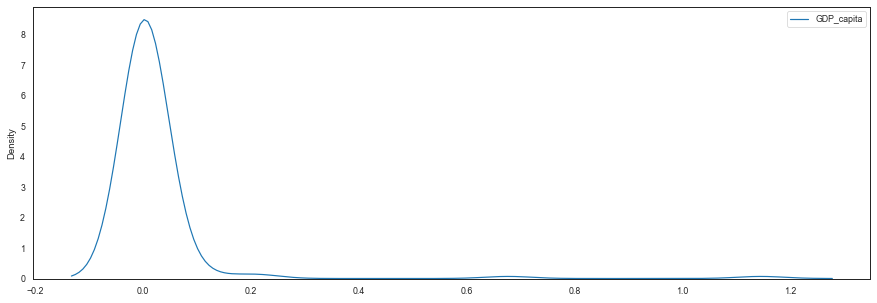

In [187]:
# visualization of KDE plot.
kde_capita = df_gdp[['GDP_capita']]
sns.kdeplot(data = kde_capita)

{'xscale': 'linear', 'yscale': 'linear'}

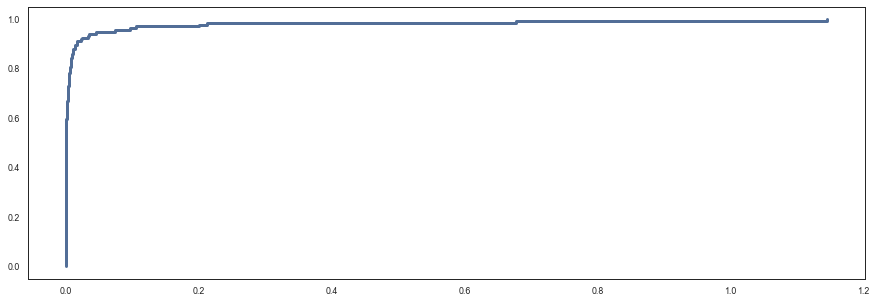

In [188]:
# visualization of CDF plot.
cdf_capita = thinkstats2.Cdf(df_gdp['GDP_capita'])
thinkplot.Cdf(cdf_capita)

### Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing the distribution. Do it <b>without</b> using a fit() method. Plot the emperical data on the same graph as the analytical distribution. 
<li>5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 
</ul>

In [189]:
df_gdp['Schooling'].describe()

count    133.000000
mean      11.691823
std        3.006460
min        4.018750
25%        9.868750
50%       12.000000
75%       13.725000
max       20.037500
Name: Schooling, dtype: float64

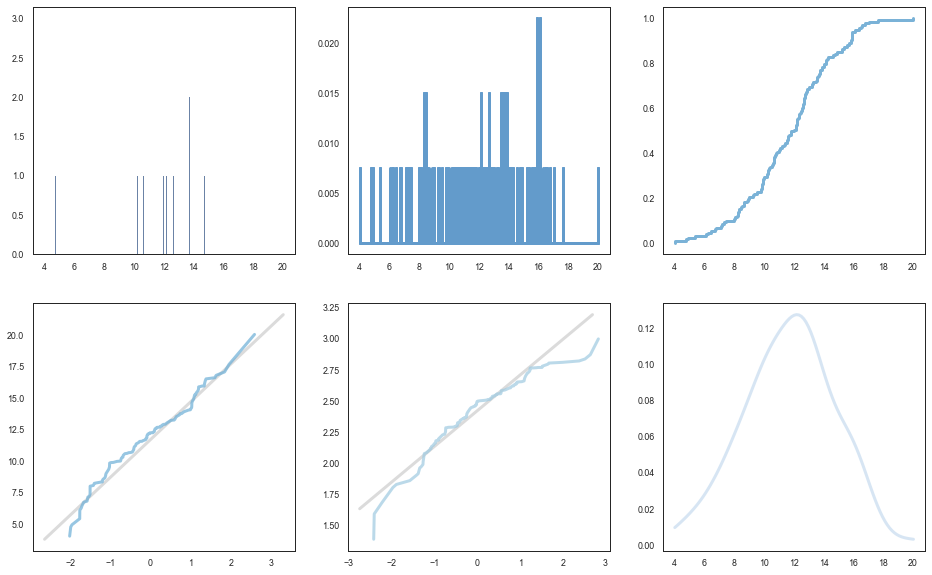

In [190]:
#Analytical for Schooling - 1 
# the schooling data seems more close to normal than GDP capita data.
all_graphs(df_gdp, 'Schooling')

In [191]:
#Analytical for Schooling - 2
# the mean is 11.69 and standard deviation is 3.00, which Schooling values are closer to the average.
# use Schooling data is more accuate than GDP_capita.
df_gdp['Schooling'].describe()

count    133.000000
mean      11.691823
std        3.006460
min        4.018750
25%        9.868750
50%       12.000000
75%       13.725000
max       20.037500
Name: Schooling, dtype: float64

c:\Users\Elsa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


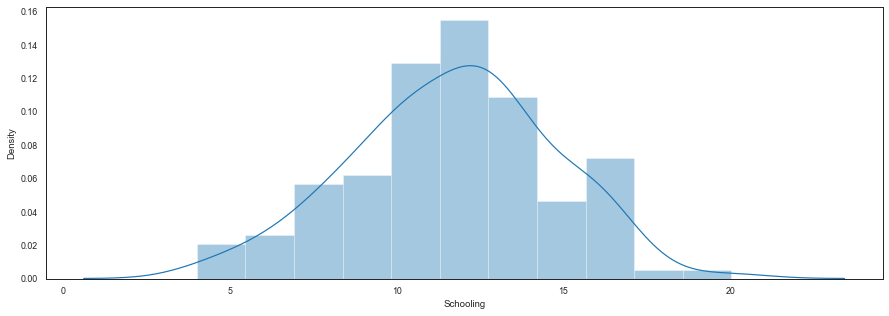

In [192]:
sns.distplot(df_gdp['Schooling'])
plt.show()
sns.set_style('white')

In [193]:
#Get some basic brain stats and save them in varaibles.
#mean, standard dev, median, and count. 
mean_school = df_gdp['Schooling'].mean()
med_school = df_gdp['Schooling'].median()
std_school = df_gdp['Schooling'].std()
num_school = df_gdp['Schooling'].count()

print('mean: ', mean_school)
print('median: ', med_school)
print('std: ', std_school)
print('count: ', num_school)

mean:  11.691823308270681
median:  12.0
std:  3.0064598793967483
count:  133


In [194]:
#Exponential simulator
# a new function for simulator
from sklearn.metrics import mean_squared_error

def simulate_emp(mean = 0, n = 100, m = 10000, ciLow = 5, ciHi = 95):
    means = []
    for j in range(m):
        xs = np.random.exponential(1/mean,n)
        xbar = 1/np.mean(xs)
        means.append(xbar)
    cdf = thinkstats2.Cdf(means)
    ci = cdf.Percentile(ciLow), cdf.Percentile(ciHi)
    rateList = [mean] * m
    stderr = mean_squared_error(means, rateList, squared=False)
    return cdf, ci, stderr

Standard Error: 1.0179155828631727
Low CI: 10.401650238074698
Hi CI: 13.56172564668728
Estimate: 12.01946849208303


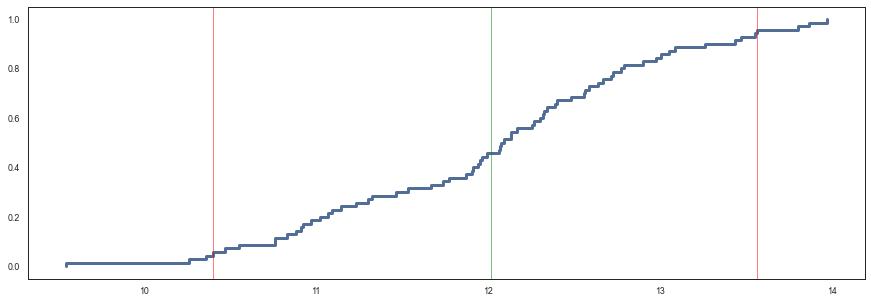

In [195]:
 # emperical data on the same graph as the analytical distribution. 

cdf, ci, stderr = simulate_emp(mean = mean_school, n = num_school, m=70, ciLow=5, ciHi=95)
print("Standard Error:", stderr)
print("Low CI:", ci[0])
print("Hi CI:", ci[1])
print("Estimate:", cdf.Mean())
thinkplot.Cdf(cdf)
thinkplot.axvline(cdf.Mean(), color="green")
thinkplot.axvline(ci[0], color="red")
thinkplot.axvline(ci[1], color="red")

In [196]:
# percentage of schooling level in Canada. 
# schooling people / population * 100 
df_gdp['percent_educate'] = df_gdp['Schooling'] / df_gdp['Population'] * 100
print(df_gdp[df_gdp['Country'].isin(['Canada'])])


   Country  isDeveloped  Lifeexpectancy  AdultMortality  infantdeaths  \
30  Canada          0.0         81.6875          64.625           2.0   

     Alcohol  HepatitisB  Measles      BMI  under-fivedeaths    Polio  \
30  8.053333   28.846154    129.5  55.8625               2.0  85.3125   

    Diphtheria           GDP    Population  Schooling  GDP_capita  \
30     91.0625  29382.907523  1.136405e+07     15.875    0.002586   

    percent_educate  
30          0.00014  


c:\Users\Elsa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


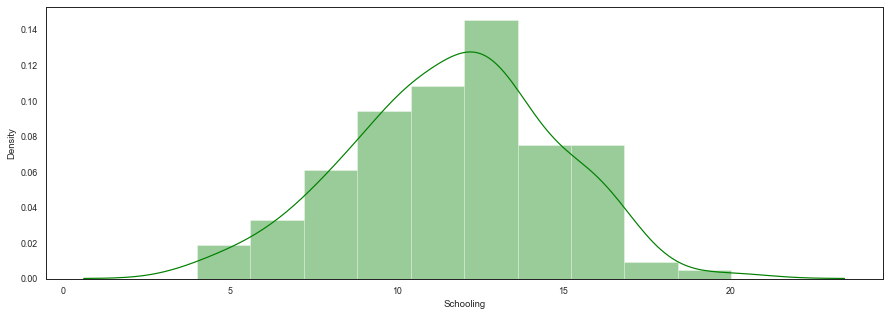

In [197]:
# using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 
sns.distplot(df_gdp['Schooling'], color = 'green', bins= 10)
plt.show()

### Part 3: Create another analytical distribution for GDP per Capita (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how. 
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it. 
</ul>

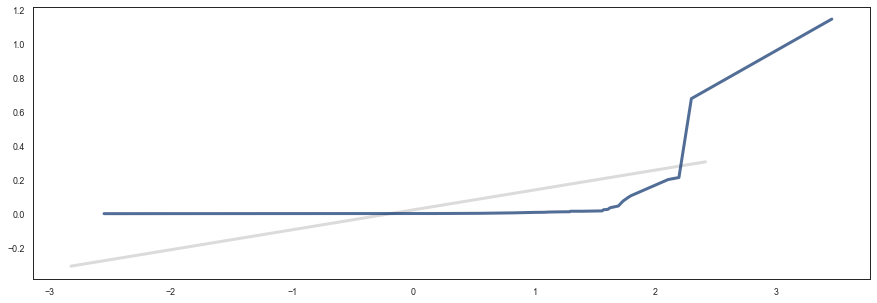

In [198]:
# Analytical for GDP/capita
# use Normal probability plot.
thinkstats2.NormalProbabilityPlot(df_gdp['GDP_capita'])


c:\Users\Elsa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


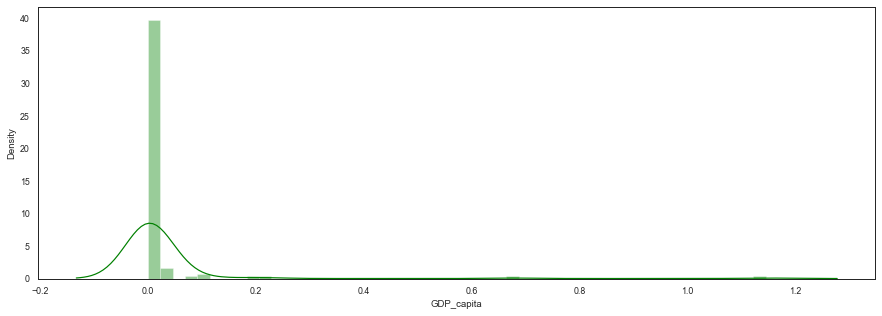

In [199]:
# the normal distribution should form almost a straight line. 
# departures from this line indicate departues from normality.

# use another analytical distribution to look at the GDP_capita data.
sns.distplot(df_gdp['GDP_capita'], color="green")
plt.show()

In [200]:
# therefore, we should drop this data.

drop_cap = df_gdp.drop(columns=['GDP_capita'])
drop_cap.head()

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,percent_educate
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.375,52.3125,340.015425,9.972260e+06,8.21250,0.000082
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.125,98.0625,2119.726679,6.969116e+05,12.13750,0.001742
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.750,91.8750,2847.853392,2.164983e+07,12.71250,0.000059
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.125,47.6875,1975.143045,1.014710e+07,8.04375,0.000079
5,Argentina,0.0,75.15625,106.0000,10.1250,7.966667,81.285714,2.0000,54.98125,11.3750,93.375,92.3750,6998.575103,2.012120e+07,16.50625,0.000082


### Part 4: Visually identify correlations. Separate developed and not developed countries is some way. (15pts)

<ul>
<li>5 points are for effectively and clearly showing the visualizations used to evaluate correlations.
<li>10 points are for, in the process of visualizing, remove outliers that confound correlations. List outlier "filters" you used and justify why - was the data an error, a real value that is just way out of line, or somethingn else? Remember, you're trying to find things that have correlations with each other. Looking at a correlation between home size and income may not benefit from Jeff Bezos being included. It may be helpful to look at the results and revise. 
</ul>

In [201]:
#Visualize correlations. 



### Part 5: Calculate correlations (25pts)

<ul>
<li>5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed. 
<li>10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
<li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?
</ul>

<b>Please put your written parts in markdown cells, with a little formatting to make them readable. 

In [202]:
#Calculate correlations and analyze. 